<a href="https://colab.research.google.com/github/monroyaume5/my_code_for_Colab/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE523: Homework 1 

This notebook has the solution to the first homework set in ECE523 at the University of Arizona. The notebook runs on Google Colab without installing other software. If you run this notebook on your local machine then you should install the Anaconda Distribution of Python. 

## Author 
* [Gregory Ditzler](http://gditzler.github.io/)

In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import friedmanchisquare
import matplotlib.pylab as plt

plt.style.use('ggplot')

## Problem 1 

See solutions on D2L. 

## Problem 2

In [2]:
def mvnrnd(mu, Sigma, N=1000): 
    return np.random.multivariate_normal(mu, Sigma, N)

def mahal(x, mu, Sigma): 
    return np.dot(np.dot(x-mu,np.linalg.inv(Sigma)), x-mu)

def disc(x, mu, Sigma, p):
    d = len(mu)
    return -mahal(x, mu, Sigma)/2 - (d/2)*np.log(2*np.pi) - np.log(np.linalg.det(Sigma)) + np.log(p)

Text(0, 0.5, '$x_2$')

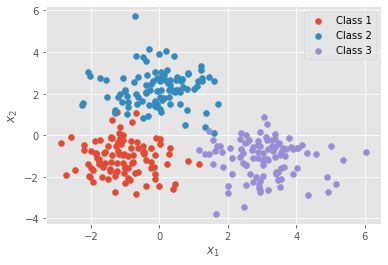

In [3]:
# test mvnrnd 
C, N = [[.8,0],[0,.8]], 100
X1, X2, X3 = mvnrnd([-1,-1], C, N), mvnrnd([0,2], C, N), mvnrnd([3,-1], C, N)

plt.figure()
plt.scatter(X1[:,0], X1[:,1], label='Class 1')
plt.scatter(X2[:,0], X2[:,1], label='Class 2')
plt.scatter(X3[:,0], X3[:,1], label='Class 3')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

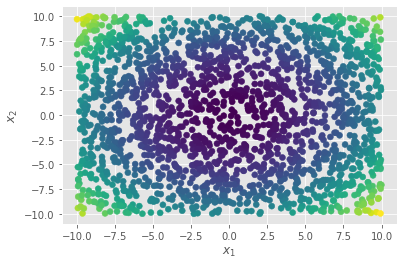

In [4]:
# test out the mahalanobis distance 
C, N = [[.8,0],[0,.8]], 100
M = 2000
X = mvnrnd([0,0], C, N)
point = np.array([.25, .25])

# get mean and covariance 
mu = np.mean(X, axis = 0)
Sigma = np.cov(X.T)


Xt = 20*np.random.rand(M, 2) - 10

md = np.zeros((M, ))
for i, x in zip(range(M), Xt): 
    md[i] = mahal(x, mu, Sigma)

plt.figure()
plt.scatter(Xt[:,0], Xt[:,1], c=md)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


Text(0, 0.5, '$x_2$')

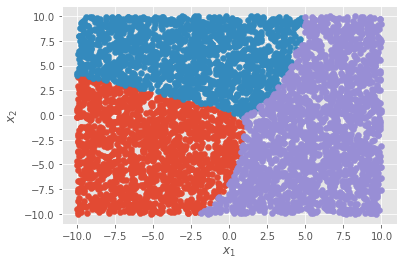

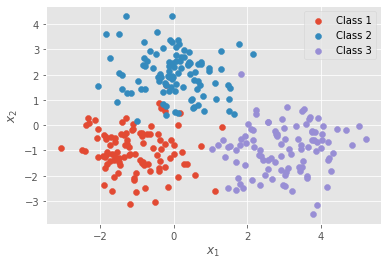

In [5]:
# test disc 
C, N, M = [[.8,0],[0,.8]], 100, 5000
X1, X2, X3 = mvnrnd([-1,-1], C, N), mvnrnd([0,2], C, N), mvnrnd([3,-1], C, N)

# get mean and covariance 
mu1, mu2, mu3 = np.mean(X1, axis = 0), np.mean(X2, axis = 0), np.mean(X3, axis = 0)
Sigma1, Sigma2, Sigma3 = np.cov(X1.T), np.cov(X2.T), np.cov(X3.T)
priors = np.array([1.,1.,1.])
priors /= priors.sum()

outcome = np.zeros((M, ))
Xt = 20*np.random.rand(M, 2) - 10

for m in range(M): 
    g1 = disc(Xt[m], mu1, Sigma1, priors[0])
    g2 = disc(Xt[m], mu2, Sigma2, priors[1])
    g3 = disc(Xt[m], mu3, Sigma3, priors[2])
    outcome[m] = np.argmax([g1, g2, g3])

plt.figure()
plt.scatter(Xt[outcome==0,0], Xt[outcome==0,1])
plt.scatter(Xt[outcome==1,0], Xt[outcome==1,1])
plt.scatter(Xt[outcome==2,0], Xt[outcome==2,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


plt.figure()
plt.scatter(X1[:,0], X1[:,1], label='Class 1')
plt.scatter(X2[:,0], X2[:,1], label='Class 2')
plt.scatter(X3[:,0], X3[:,1], label='Class 3')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

## Problem 3

In [6]:
def sample(N, p):
    random_sample = np.zeros(N)
    p_estimate = np.zeros(len(p))
    p_cdf = np.cumsum(p)
    counts = np.zeros(len(p))

    for n in range(N):
        # generate a random number on [0,1]
        x = np.random.rand()
        random_sample[n] = np.where(((p_cdf > x)*1.0) == 1.)[0][0]
        counts[int(random_sample[n])] += 1

    p_estimate = counts/counts.sum()
    return random_sample, p_estimate

def kl(p1, p2): 
    return (new_p*np.log(new_p/p)).sum()

def divergence(p1, p2): 
    return (kl(p1, p2) + kl(p2, p1))/2.0


In [7]:
# number of items in the sample space
N = 5
# generate a random distribution for the samples
p = np.random.rand(N)*np.random.rand(N)
p = p/p.sum()
new_n, new_p = sample(5000, p)
print('Theoretical p')
print(p)
print('Estimate of p')
print(new_p)
print('Symmetric KL Divergence')
print(divergence(p, new_p))

Theoretical p
[0.01337848 0.26693287 0.36664708 0.05783398 0.29520759]
Estimate of p
[0.014  0.2596 0.3782 0.0622 0.286 ]
Symmetric KL Divergence
0.0006019184818553801


In [8]:
# is there a difference between the difference classifiers 
alpha = 0.05
X = pd.read_csv('hw1-scores.txt', header=None).values
s, p = friedmanchisquare(X[:,0], X[:,1], X[:,2], X[:,3], X[:,4], X[:,5])
if p <= alpha:
    print('Reject the null hypothesis')
else: 
    print('Fail to reject the null hypothesis')

Reject the null hypothesis
